In [63]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import operator
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.spatial import distance
import csv
import random

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

# Library Data Collection
- Here we have the user login to their spotify account so we can collect their library information

In [64]:
tracks = []
songs_user = []
results = sp.current_user_saved_tracks(limit = 50, offset = 0)
for idx, item in enumerate(results['items']):
    track = item['track']
    artist_pop = sp.artist(track['artists'][0]['uri'])['popularity']
    features = sp.audio_features(track['uri'])
    songs_user.append([features[0]['danceability'],
                  features[0]['energy'],
                  features[0]['speechiness'],
                  features[0]['acousticness'],
                  features[0]['valence']])
    d = {'danceability': abs(features[0]['danceability']),
         'energy': abs(features[0]['energy']),
         'speechiness': abs(features[0]['speechiness']),
         'acousticness': abs(features[0]['acousticness']),
         'instrumentalness': abs(features[0]['instrumentalness']),
         'liveness': abs(features[0]['liveness']),
         'valence': abs(features[0]['valence'])}
    d = list(d.items())
    d = sorted(d, key=lambda x: x[1], reverse=True)
    top_feature = d[0][0]
    secondary_feature = d[1][0]
    third_feature = d[2][0]
    track_info = track['artists'][0]['name'], track['name'], track['popularity'], artist_pop, top_feature, secondary_feature, third_feature
    tracks.append(track_info)

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/?code=AQCqT1FLqSBQx-zOSSs2cREQ5kiwBxk27fI6n5yDVwF_uIgeCfn1P4XfQRu-H4uCxG7n3z2rZwTajRVbdrtjD_hIxiDxzM0fP72ODxIKBXA9cjHmiUgQtef26yyGZyEEeQxCQMvhMN8mEUFsuN7N5Pvac8xMrsXNubx7mnSQD3Topp0aAAvi


In [65]:
offset = 50
while results['items'] != []:
    results = sp.current_user_saved_tracks(limit=50, offset = offset)
    for idx, item in enumerate(results['items']):
        track = item['track']
        artist_pop = sp.artist(track['artists'][0]['uri'])['popularity']
        features = sp.audio_features(track['uri'])
        songs_user.append([features[0]['danceability'],
              features[0]['energy'],
              features[0]['speechiness'],
              features[0]['acousticness'],
              features[0]['valence']])
        d = {'danceability': abs(features[0]['danceability']),
             'energy': abs(features[0]['energy']),
             'speechiness': abs(features[0]['speechiness']),
             'acousticness': abs(features[0]['acousticness']),
             'instrumentalness': abs(features[0]['instrumentalness']),
             'liveness': abs(features[0]['liveness']),
             'valence': abs(features[0]['valence'])}
        d = list(d.items())
        d = sorted(d, key=lambda x: x[1], reverse=True)
        top_feature = d[0][0]
        secondary_feature = d[1][0]
        third_feature = d[2][0]
        track_info = track['artists'][0]['name'], track['name'], track['popularity'], artist_pop, top_feature, secondary_feature, third_feature
        tracks.append(track_info)
    offset += 50

In [66]:
tracks_pd = pd.DataFrame(tracks, columns = ['Artist', 'Song', 'Track_Popularity', 'Artist_Popularity', 'Top_Feature', 'Second_Feature', 'Third_Feature'])
tracks_pd = tracks_pd[tracks_pd.Track_Popularity != 0]
tracks_pd = tracks_pd[tracks_pd.Artist_Popularity != 0]

In [67]:
tracks_np = np.array(tracks)

# Library Information Table

In [68]:
tracks_pd

,Artist,Song,Track_Popularity,Artist_Popularity,Top_Feature,Second_Feature,Third_Feature
0,Frank Turner,Recovery,41,60,energy,valence,danceability
1,Frank Turner,Losing Days,26,60,energy,valence,danceability
2,Frank Turner,The Way I Tend To Be,37,60,energy,valence,danceability
3,Frank Turner,Plain Sailing Weather,33,60,energy,valence,danceability
4,Frank Turner,Good & Gone,19,60,danceability,energy,liveness
...,...,...,...,...,...,...,...
642,Crowded House,As Sure As I Am,27,69,valence,energy,danceability
643,Crowded House,Italian Plastic,33,69,valence,acousticness,danceability
644,Crowded House,She Goes On,36,69,acousticness,valence,danceability
645,Crowded House,How Will You Go/I'm Still Here - Medley,26,69,energy,liveness,acousticness


In [69]:
print(f"You really look for {tracks_pd.groupby(['Top_Feature']).count()['Artist'].idxmax()} most in your music, but you also really value {tracks_pd.groupby(['Second_Feature']).count()['Artist'].idxmax()} and like a little {tracks_pd.groupby(['Third_Feature']).count()['Artist'].idxmax()}!")

You really look for energy most in your music, but you also really value danceability and like a little danceability!


In [70]:
print(f"The average track in your library has a popularity rating of {round(np.mean(tracks_np[:, 2].astype(int)),2)} out of 100!")

The average track in your library has a popularity rating of 22.01 out of 100!


In [71]:
print(f"The average artist in your library has a popularity rating of {round(np.mean(tracks_np[:, 3].astype(int)),2)} out of 100!")

The average artist in your library has a popularity rating of 60.14 out of 100!


In [72]:
scope = "user-top-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

In [73]:
long_term_artist = []
mid_term_artist = []
short_term_artist = []

top_artists = sp.current_user_top_artists(limit = 10, time_range='long_term')
for idx, item in enumerate(top_artists['items']):
    long_term_artist.append(sp.artist(item['uri'])['name'].split("\n"))

top_artists2 = sp.current_user_top_artists(limit = 10, time_range='medium_term')
for idx, item in enumerate(top_artists2['items']):
    mid_term_artist.append(sp.artist(item['uri'])['name'].split("\n"))
    
top_artists3 = sp.current_user_top_artists(limit = 10, time_range='short_term')
for idx, item in enumerate(top_artists3['items']):
    short_term_artist.append(sp.artist(item['uri'])['name'].split("\n"))

long_term_artist = pd.DataFrame(long_term_artist, columns = ['Artist'])
mid_term_artist = pd.DataFrame(mid_term_artist, columns = ['Artist'])
short_term_artist = pd.DataFrame(short_term_artist, columns = ['Artist'])

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/?code=AQC1lxkfoCi4buEHPj9Zdczlgu0CFKQrIcQlpcjBLjDMCdAtJoKUDDhGeCqMfA77EnetRpKYBI3JMYbCFYdPy9-LPqPW-USe1DVssw5pB2teU7kx3-apBasL2JTPrIy4C5YoQvHdzzL6yG-g0eWVyijYKapLCrTJpjIdnc4EiqyFGbQ


# Top Artists
- Here is a breakdown of your top artists and how they've change (or stayed the same over time)!

In [74]:
long_term_artist

,Artist
0,Zedd
1,BIGBANG
2,2NE1
3,BLACKPINK
4,WINNER
5,iKON
6,AILEE


In [75]:
mid_term_artist

,Artist


In [76]:
short_term_artist

,Artist


In [77]:
top_artists = pd.concat([long_term_artist, mid_term_artist, short_term_artist]).drop_duplicates()

In [78]:
long_mid_and_short = []
long_mid_not_short = []
mid_short_not_long = []

for index, row in top_artists.iterrows():
    if (long_term_artist[long_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False and 
    mid_term_artist[mid_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False and 
    short_term_artist[short_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False):
        long_mid_and_short.append(row['Artist'])
    elif (long_term_artist[long_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False and 
    mid_term_artist[mid_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False and 
    short_term_artist[short_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty):
        long_mid_not_short.append(row['Artist'])
    elif (long_term_artist[long_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty and 
    mid_term_artist[mid_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False and 
    short_term_artist[short_term_artist['Artist'].astype(str).str.contains(row['Artist'])].empty == False):
        mid_short_not_long.append(row['Artist'])

In [79]:
if long_mid_and_short:
    print("These artists are your ride or dies, you listened to them years ago, and you still listen now, you never stopped being a fan...", long_mid_and_short)

else:
    print("You change things up a lot, it seems like you never keep the same artists in rotation!")

You change things up a lot, it seems like you never keep the same artists in rotation!


In [80]:
if long_mid_not_short:
    print("Maybe show these artists some more love, it's been a minute...", long_mid_not_short)
else:
    print("You really show your favorite artists love all the time. You always keep them in rotation!")

You really show your favorite artists love all the time. You always keep them in rotation!


In [81]:
if mid_short_not_long:
    print("Looks like these artists are a newfound love...", mid_short_not_long)
else:
    print("Looks like none of your favorite artists were discovered in the past month!")

Looks like none of your favorite artists were discovered in the past month!


# Visualization of Your Library!

In [82]:
pd.options.plotting.backend = "plotly"
fig = tracks_pd.plot.scatter(x='Track_Popularity', y='Artist_Popularity', color='Top_Feature', hover_name="Song", hover_data=["Artist"], title="Library Track/Artist Breakdown")
fig.show()

In [83]:
pd.options.plotting.backend = 'matplotlib'
features = tracks_pd.groupby(['Top_Feature']).count()['Artist']

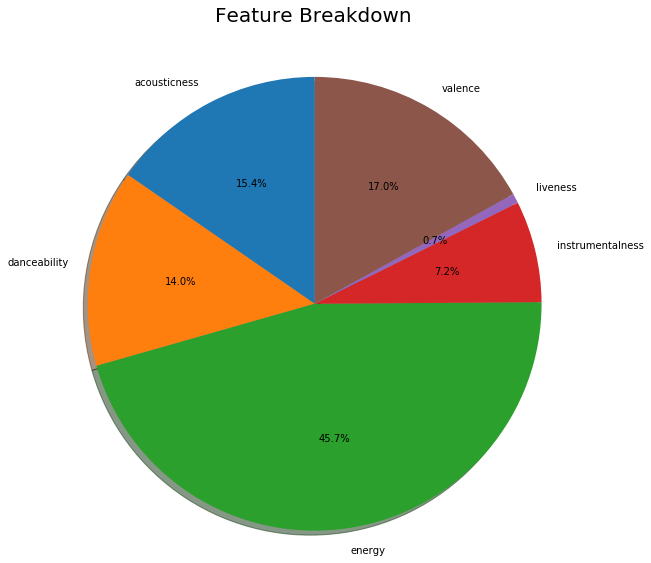

In [84]:
labels = list(features.index)
vals = list(features.values)

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(vals, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Feature Breakdown', pad=40, size=20)
plt.show()

In [92]:
target = random.choice(songs_user)

songs = []
with open("tracks_unique.csv", newline="", mode="r") as csvfile:
    reader = csv.DictReader(csvfile)
    count = 0
    for row in reader:

        song = [
            float(row["danceability"]),
            float(row["energy"]),
            float(row["speechiness"]),
            float(row["acousticness"]),
            float(row["valence"]),
        ]

        dist = distance.euclidean(target, song)
        if len(songs) <= 10:
            songs.append([row["song_name"], row["song_artist"], dist])
            sorted(songs, key=lambda x: x[2])
        else:
            if dist < songs[-1][2]:
                songs.remove(songs[-1])
                songs.append([row["song_name"], row["song_artist"], dist])
                songs.sort(key=lambda x: x[2])
                # print(songs)
#         if count % 100 == 0:
# #             print(count)
        count += 1

print("Based off of your libary, here are 10 songs we think you'll like: ")
for i in songs:
    print("'" + i[0] + "'" + " by " + i[1])

Based off of your libary, here are 10 songs we think you'll like: 
'A Change Is Gonna Come - Recorded At Spotify Studios NYC' by Ledisi
'Shadow' by Jimmy Levy
'Little Sparrow' by Leyla McCalla
'Harpsichord Concerto No. 7 in G Minor, BWV 1058: III. Allegro assai' by Johann Sebastian Bach
'Dancing When I Die' by Heather Janssen
'Why Me' by Kris Kristofferson
'That's Amore - 1998 Remastered' by Dean Martin
'Rolls for Rolling' by Daniel Karlsson Trio
'Guiding Light - Radio Edit' by Foy Vance
'Last Smoke Before The Snowstorm' by Benjamin Francis Leftwich
'James Dean' by David Keenan
